* Summarize the fresh water flux and plume position affected by winds and the Coriolis force under different river flows in two overall graphs. 

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
## load statistics of fluxes, positions and river flow info.
fluxes = {}; positions = {}; flows_low = {};flows_high = {}
values_fluxes = [1111,4545,2098,2426,7069,880,950,3632,-3815,555]
values_positions = [1.5,2,1.5,5,2.5,1.5,1.5,5,-3.5,0.5]
names = ['CoriolisOct','CoriolisMay','CoriolisJan','ModerateNWOct','ModerateNWMay','ModerateNWJan','ModerateSEMay','StrongNWOct','StrongSEMay','StrongNWJan']
flow_low = [1706,3653,804,2192,3949,940,4987,2314,4001,934]
flow_high = [1873,3691,849,2335,4677,953,5312,2425,4121,1164]
for name, flux in zip(names,values_fluxes): ## load flux
    fluxes[name] =  flux
for name, po in zip(names,values_positions): ## load position
    positions[name] = po
for name,fl in zip(names,flow_low): ## load high river flow
    flows_low[name] = fl
for name, fh in zip(names, flow_high): ## load low river flow
    flows_high[name] = fh

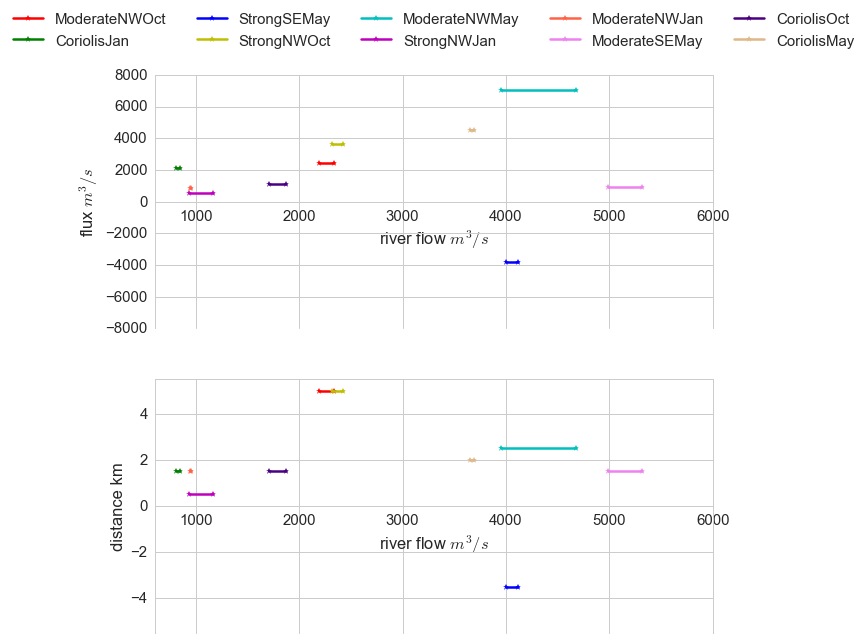

In [3]:
fig,axs = plt.subplots(2,1,figsize = (10,10))
colors = ['r','g','b','y','c','m','tomato','violet','indigo','burlywood']
for ax in axs:
    ax.spines['bottom'].set_position('zero')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
ax = axs[0]
ax.set_xlabel('river flow $m^3/s$')
ax.set_xlim([600,6000])
ax.set_ylim([-8000,8000])
ax.set_ylabel('flux $m^3/s$')
for flux, c in zip(fluxes,colors):
    ax.plot([flows_low[flux],flows_high[flux]],[fluxes[flux],fluxes[flux]],color = c,marker = '*',label = flux)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=5, fancybox=False, shadow=True)   
ax = axs[1]
for po, c in zip(positions,colors):
    ax.plot([flows_low[po],flows_high[po]],[positions[po],positions[po]],color = c,marker = '*',label = po)
ax.set_xlabel('river flow $m^3/s$')
ax.set_xlim([600,6000])
ax.set_ylim([-5.5,5.5])
ax.set_ylabel('distance km')